In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/CIDCO FINAL DATASET.csv")

In [ ]:
df.head()

,application_ID,applicant_name,category,Location,RERA_Number,Nearest_Railway_Station,Distance_from_Railway_Station_km,Type,Carpet_Area_sqft,No_of_Towers,...,distance_category,price_per_sqft,price_efficiency,has_rera,location_popularity,location_type,Nearest_Hospital,Hospital_Distance,Nearest_School,School_Distance
0,'240100828416,Sheetal Shamrao Patil,General,Kharghar (E) Taloja Sector 37,P52000028240,Taloje Panchnand Railway Station,3.0,Ews,322,43,...,moderate,9906.832298,affordable,1,64,standard,Sri Sathya Sai Sanjeevani Hospital,0.57 km,Arqam English School (CBSE),0.77 km
1,'240100139779,Smital Shubham Otari,ST (SCHEDULED TRIBES),Panvel (W) Bus Terminus,P52000028389,Panvel Railway Station,1.0,Lig,322,11,...,near,13012.422360,expensive,1,64,standard,LifeLine Hospital Panvel,1.5 km,St. Joseph’s High School,1.2 km
2,'240100855566,Amol Nana Barkade,ST (SCHEDULED TRIBES),Kharghar Station,P52000033542,Kharghar Railway Station,0.5,Lig A,398,4,...,near,8592.964824,affordable,1,180,popular,MGM Hospital Kharghar,1.0 km,Ryan International School,0.9 km
3,'240100960014,Saurabh Devidas Palve,General,Bamandongri,P52000028209,Bamandongri Railway Station,0.5,Ews,322,3,...,near,11987.577640,affordable,1,62,standard,Matoshree Multispeciality Hospital,2.0 km,Radcliffe School Ulwe,1.8 km
4,'240100640019,Amit Laxman Dhaigude,RM (RELIGIOUS MINORITIES),Kharkopar Plot 3 Sector 16,P52000028420,Kharkopar Railway Station,2.0,Lig,322,19,...,near,12515.527950,affordable,1,59,standard,Indravati Hospital,2.3 km,Radcliffe School,1.5 km


In [ ]:
df.columns = [c.strip() for c in df.columns]
numeric_cols = [
    "Distance_from_Railway_Station_km", "Carpet_Area_sqft",
    "No_of_Towers", "Price_lakhs", "price_per_sqft",
    "price_efficiency", "location_popularity",
    "Hospital_Distance", "School_Distance"
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
if 'has_rera' in df.columns:
    df['has_rera'] = df['has_rera'].astype(str).str.lower().map({'true':True, 'false':False, '1':True, '0':False, 'y':True, 'n':False})
df.info()
df.isna().mean().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   application_ID                    1001 non-null   object 
 1   applicant_name                    1001 non-null   object 
 2   category                          1001 non-null   object 
 3   Location                          1001 non-null   object 
 4   RERA_Number                       1001 non-null   object 
 5   Nearest_Railway_Station           1001 non-null   object 
 6   Distance_from_Railway_Station_km  1001 non-null   float64
 7   Type                              1001 non-null   object 
 8   Carpet_Area_sqft                  1001 non-null   int64  
 9   No_of_Towers                      1001 non-null   int64  
 10  Price_lakhs                       1001 non-null   float64
 11  price_category                    1001 non-null   object 
 12  distan

,0
School_Distance,1.0
Hospital_Distance,1.0
price_efficiency,1.0
category,0.0
application_ID,0.0
applicant_name,0.0
Nearest_Railway_Station,0.0
RERA_Number,0.0
Location,0.0
Distance_from_Railway_Station_km,0.0


In [ ]:
#type of variables
continuous_cols = ['Distance_from_Railway_Station_km', 'Carpet_Area_sqft', 'No_of_Towers', 'Price_lakhs', 'price_per_sqft', 'location_popularity']
discrete_cols = ['category', 'Location', 'Type', 'price_category', 'distance_category', 'location_type']

print("Continuous columns:", continuous_cols)
print("Discrete columns:", discrete_cols)

Continuous columns: ['Distance_from_Railway_Station_km', 'Carpet_Area_sqft', 'No_of_Towers', 'Price_lakhs', 'price_per_sqft', 'location_popularity']
Discrete columns: ['category', 'Location', 'Type', 'price_category', 'distance_category', 'location_type']


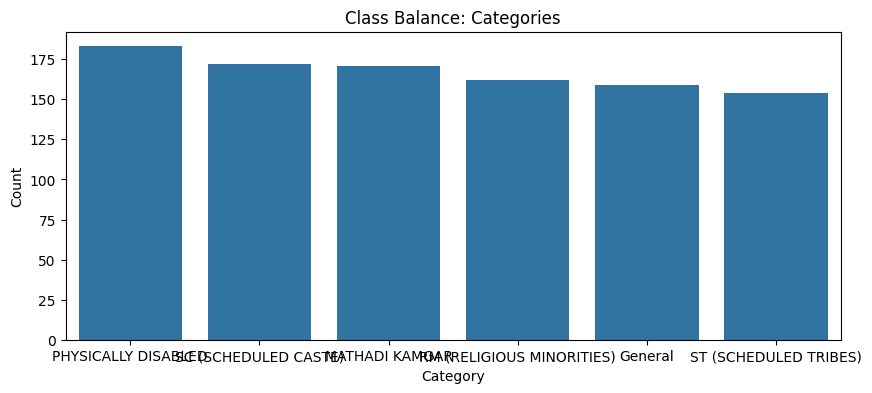

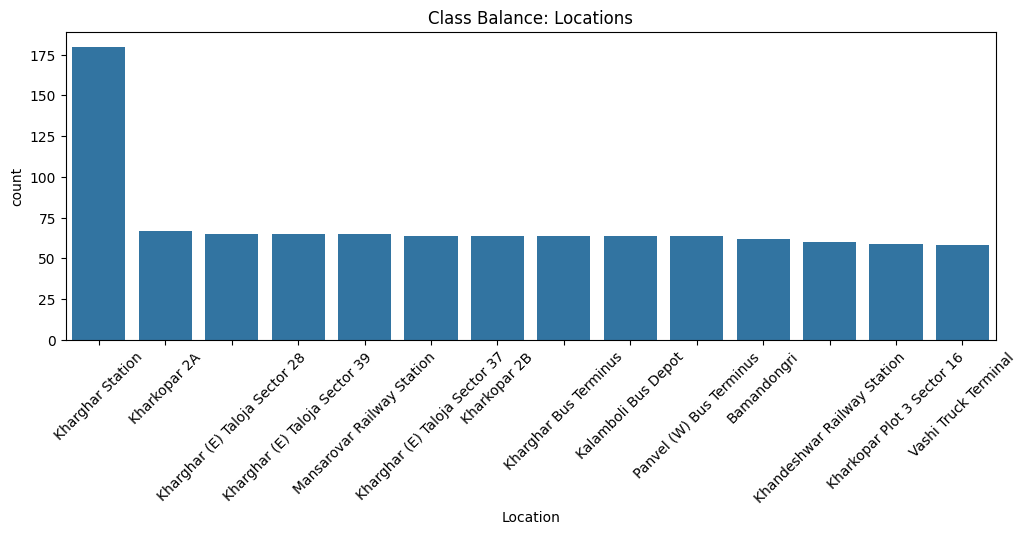

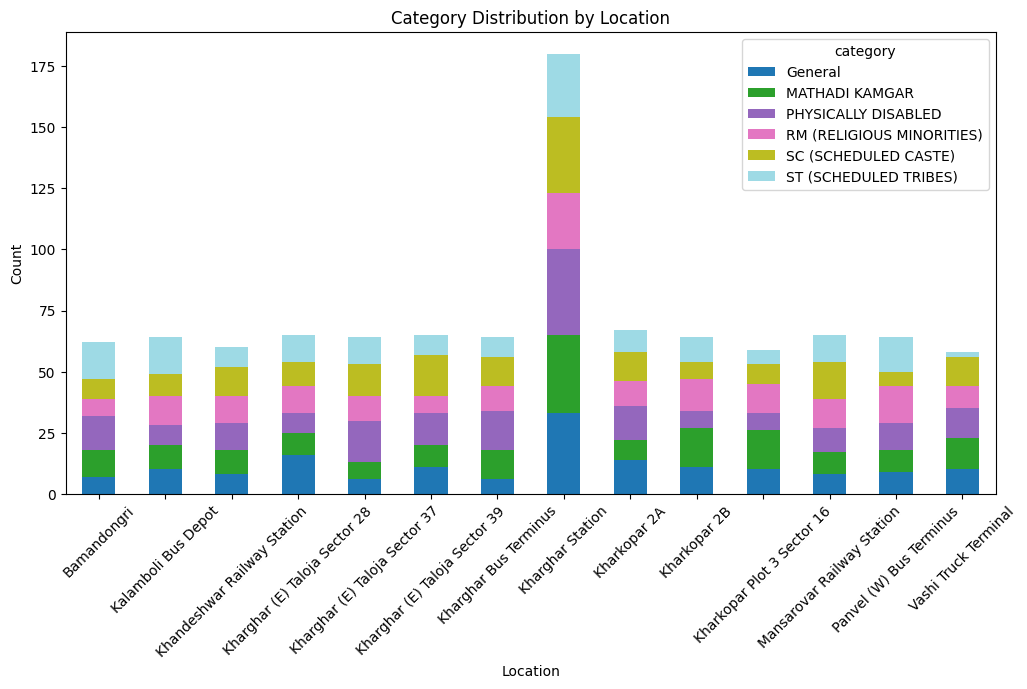

In [ ]:
#class balance plots
plt.figure(figsize=(10,4))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title("Class Balance: Categories")
plt.xticks(rotation=45)
plt.xlabel("Category"); plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index)
plt.title("Class Balance: Locations")
plt.xticks(rotation=45)
plt.show()

#category distribution per location
cat_loc = pd.crosstab(df['Location'], df['category'])
cat_loc.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Category Distribution by Location")
plt.xlabel("Location"); plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


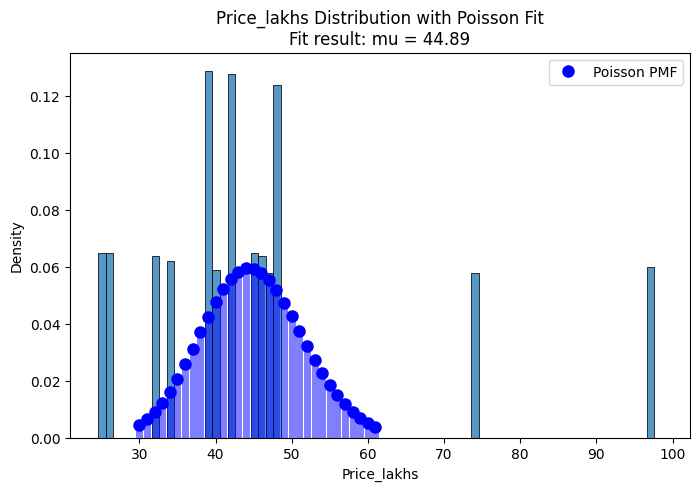

In [ ]:
from scipy.stats import poisson
plt.figure(figsize=(8, 5))
#Plot histogram with bins centered on integers
sns.histplot(df['Price_lakhs'].dropna(),
             bins=np.arange(df['Price_lakhs'].min(), df['Price_lakhs'].max() + 2) - 0.5,
             stat="density")
mu_poisson = df['Price_lakhs'].dropna().mean()
#Generate x values for PMF plot
x = np.arange(poisson.ppf(0.01, mu_poisson), poisson.ppf(0.99, mu_poisson) + 1)
#Plot
plt.plot(x, poisson.pmf(x, mu_poisson), 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson.pmf(x, mu_poisson), colors='b', lw=5, alpha=0.5)

plt.title(f"Price_lakhs Distribution with Poisson Fit\nFit result: mu = {mu_poisson:.2f}")
plt.legend()
plt.show()

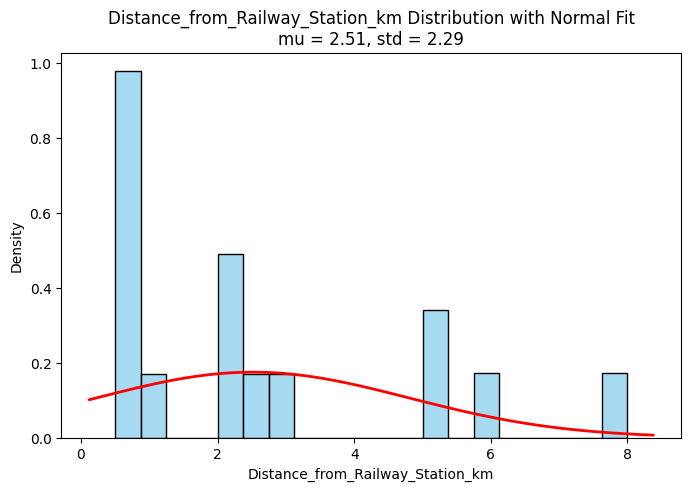

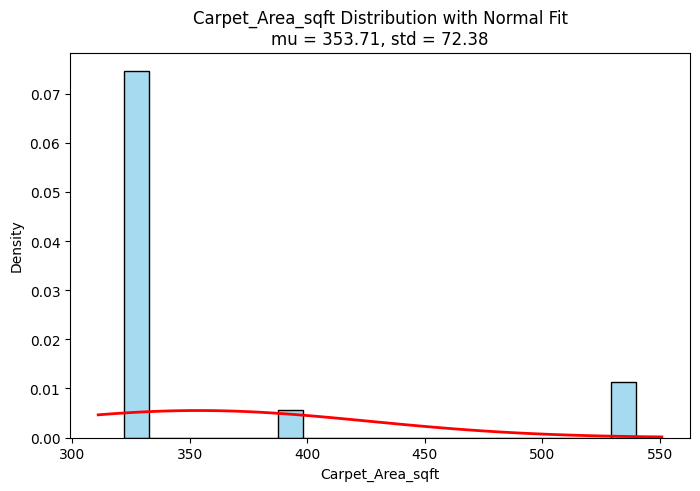

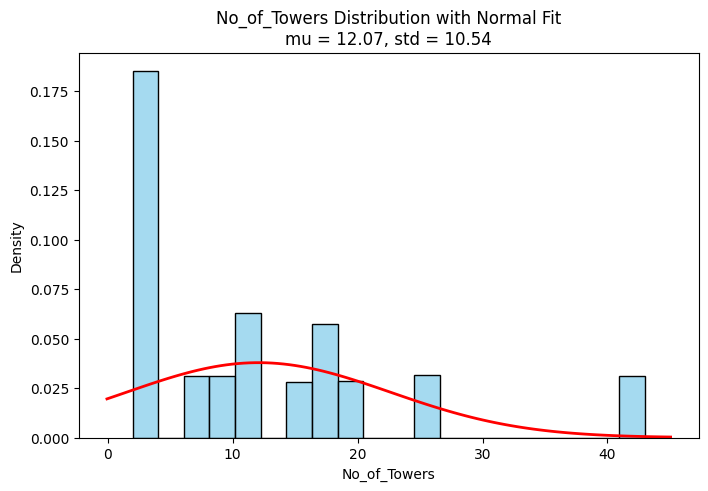

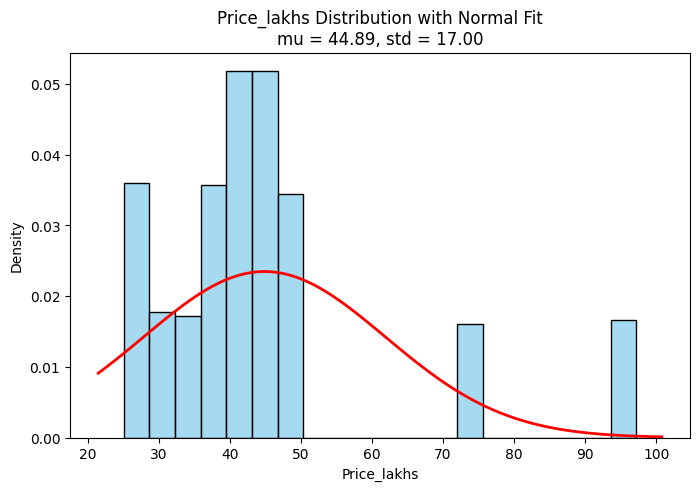

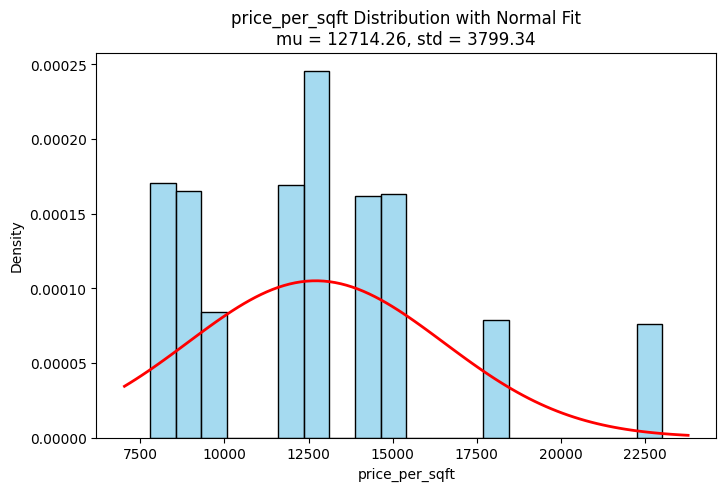

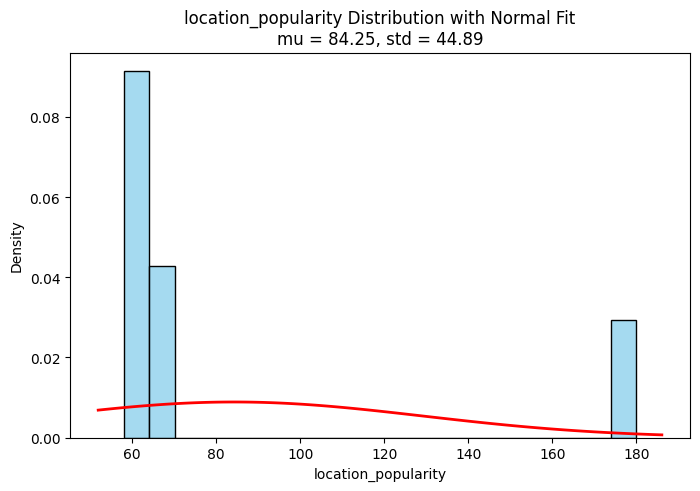

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson


# Plot continuous variables with Normal distribution fit
for col in continuous_cols:
    data = df[col].dropna()
    mu, std = norm.fit(data)

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=20, kde=False, stat="density", color='skyblue')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f"{col} Distribution with Normal Fit\nmu = {mu:.2f}, std = {std:.2f}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


In [ ]:
#Identify outliers
#use of a Z-score threshold of 3

outlier_indices = {}

cols_to_check = ['No_of_Towers', 'Carpet_Area_sqft', 'location_popularity']

for col in cols_to_check:
    if col in df.columns and df[col].nunique() > 1:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = df[col].dropna()[z_scores > 1]
        outlier_indices[col] = outliers.index.tolist()
        print(f"Outliers in {col} (Z-score > 3): {len(outliers)}")

print("\nIndices of outliers per column:")
for col, indices in outlier_indices.items():
    print(f"{col}: {indices}")

Outliers in No_of_Towers (Z-score > 3): 129
Outliers in Carpet_Area_sqft (Z-score > 3): 124
Outliers in location_popularity (Z-score > 3): 180

Indices of outliers per column:
No_of_Towers: [0, 12, 16, 18, 37, 43, 53, 59, 69, 75, 91, 93, 101, 107, 117, 123, 133, 139, 152, 154, 165, 171, 181, 187, 197, 203, 216, 220, 222, 241, 247, 257, 263, 273, 279, 295, 297, 305, 311, 321, 327, 337, 343, 356, 358, 369, 375, 385, 391, 401, 407, 412, 418, 428, 434, 444, 450, 463, 465, 476, 482, 492, 498, 508, 512, 522, 528, 538, 544, 549, 555, 565, 571, 581, 587, 600, 602, 613, 619, 629, 635, 646, 652, 662, 668, 673, 679, 689, 695, 705, 711, 724, 726, 737, 743, 753, 759, 764, 770, 780, 786, 791, 797, 807, 813, 823, 829, 842, 844, 855, 861, 871, 877, 881, 891, 897, 910, 912, 923, 929, 939, 945, 956, 962, 972, 978, 983, 989, 999]
Carpet_Area_sqft: [7, 14, 20, 30, 39, 46, 51, 62, 64, 78, 86, 94, 103, 110, 115, 126, 128, 142, 147, 158, 167, 174, 179, 190, 192, 206, 211, 218, 224, 234, 243, 250, 255, 266, 2

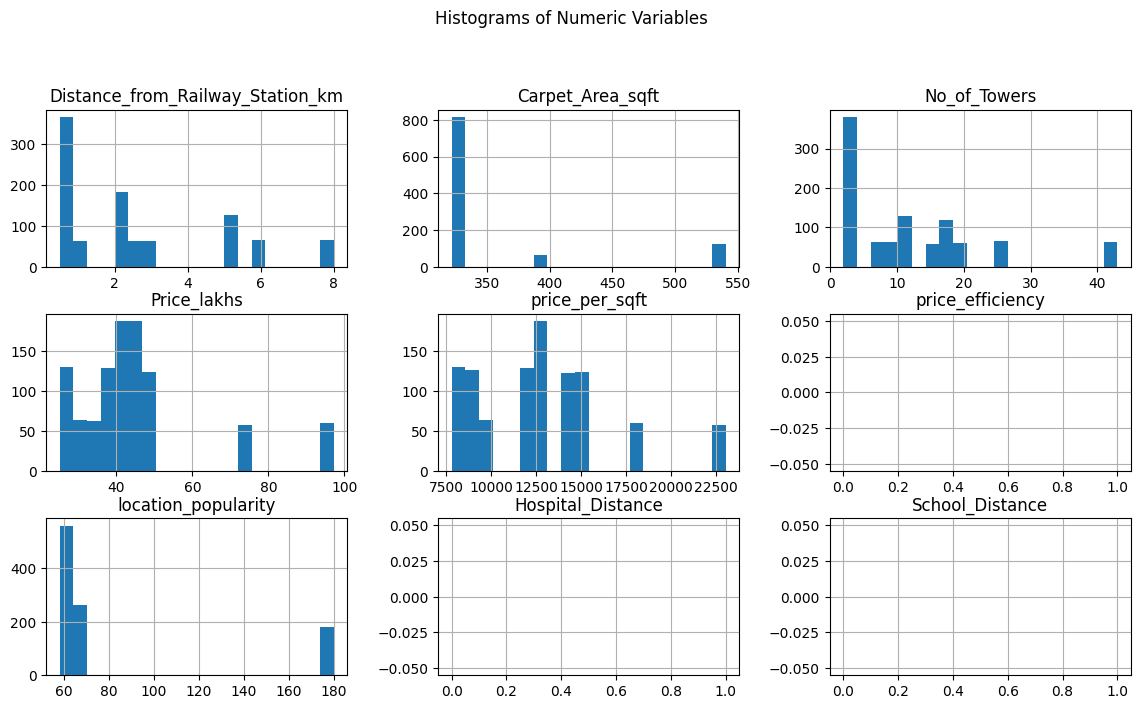

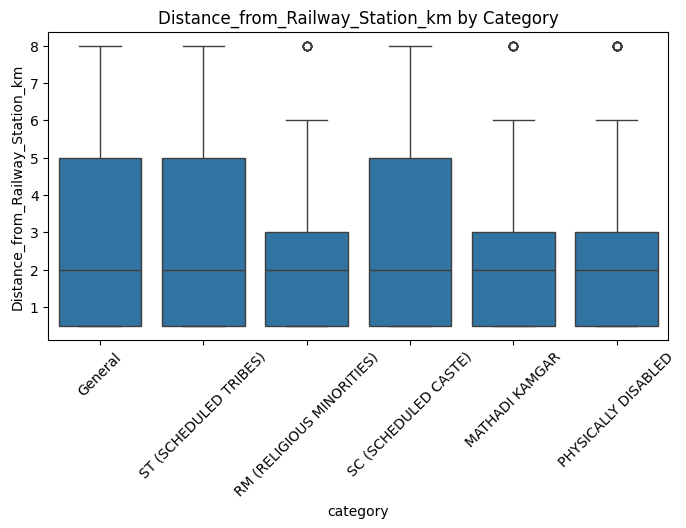

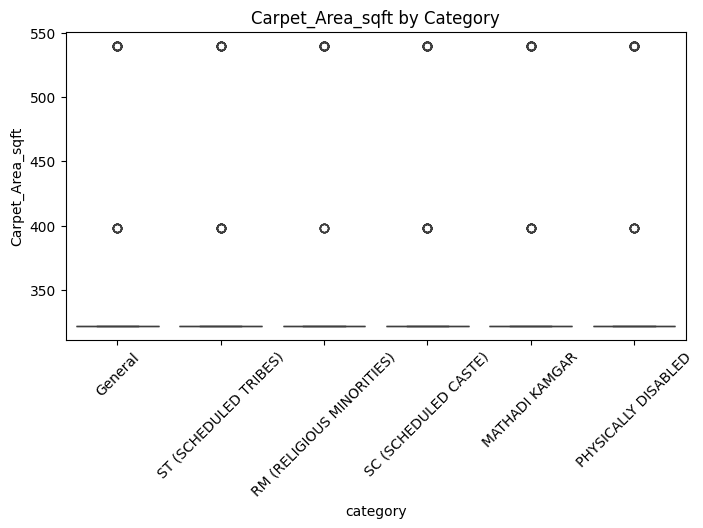

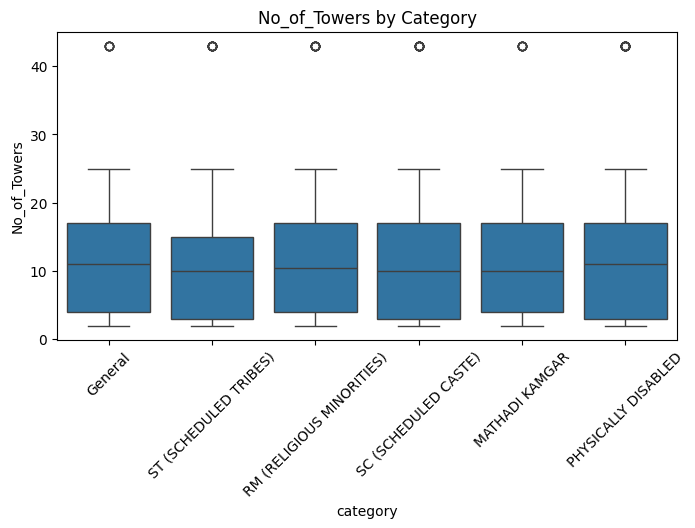

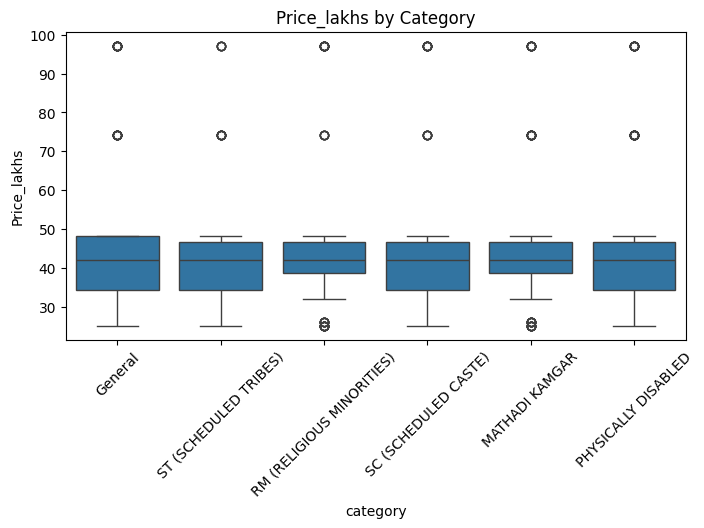

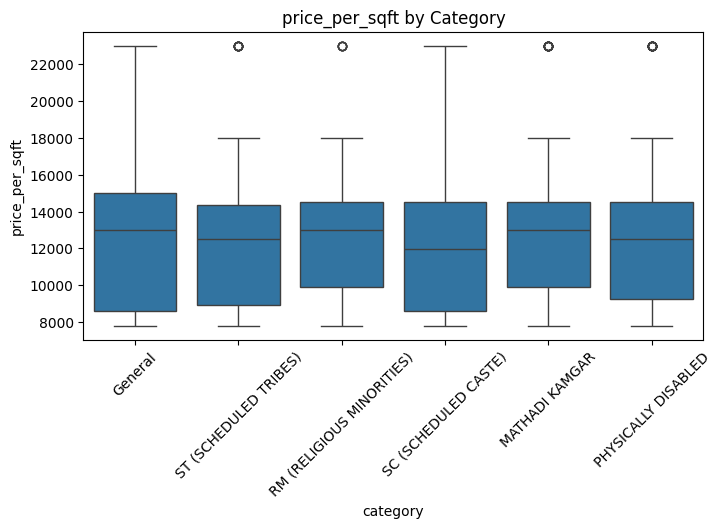

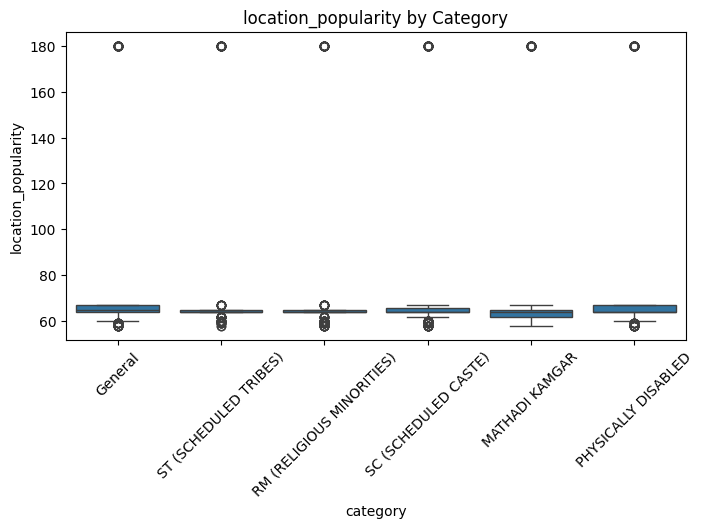

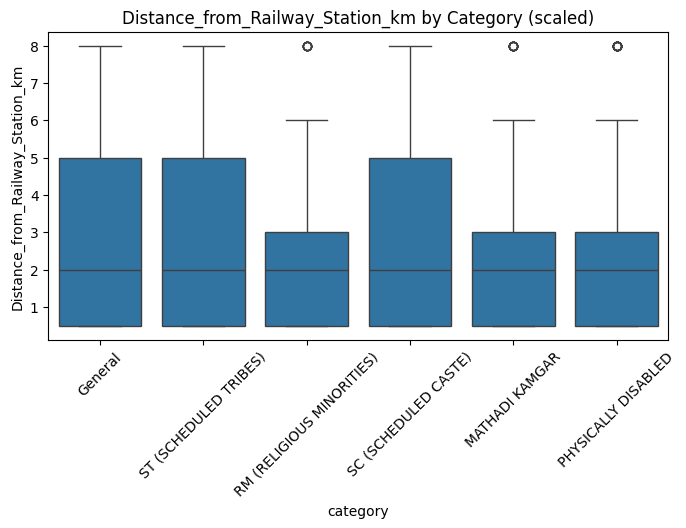

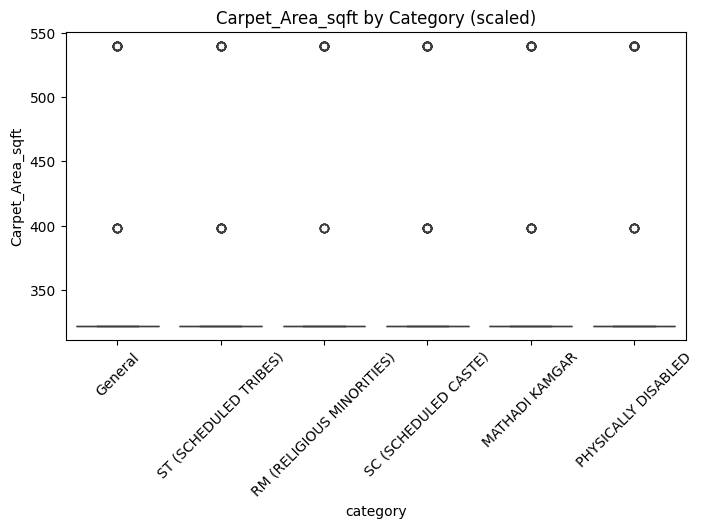

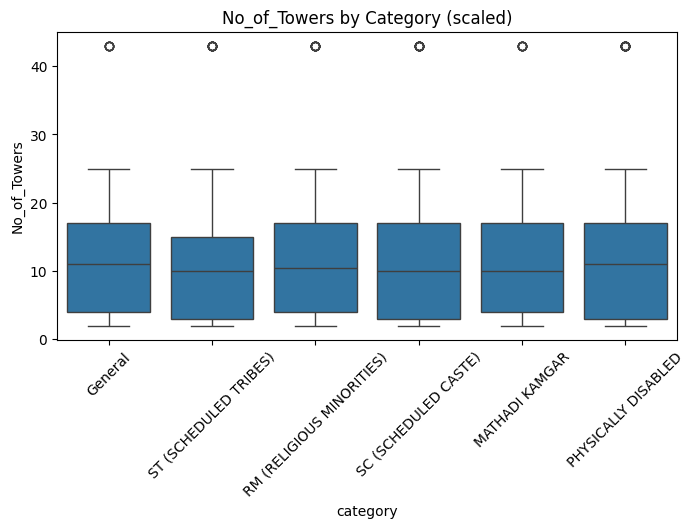

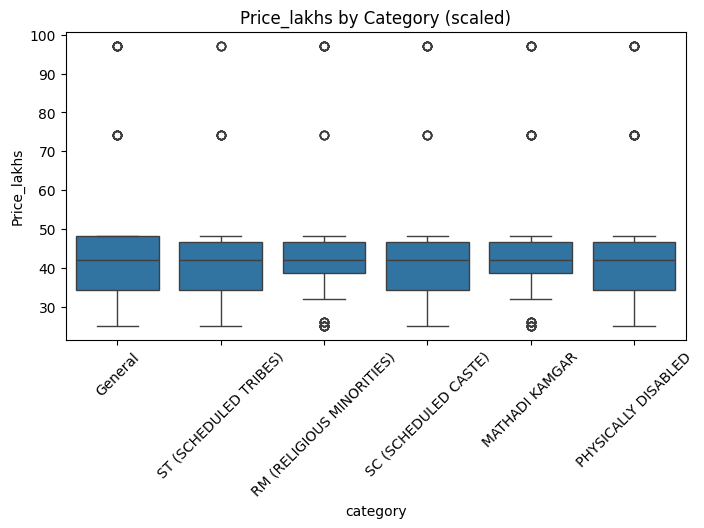

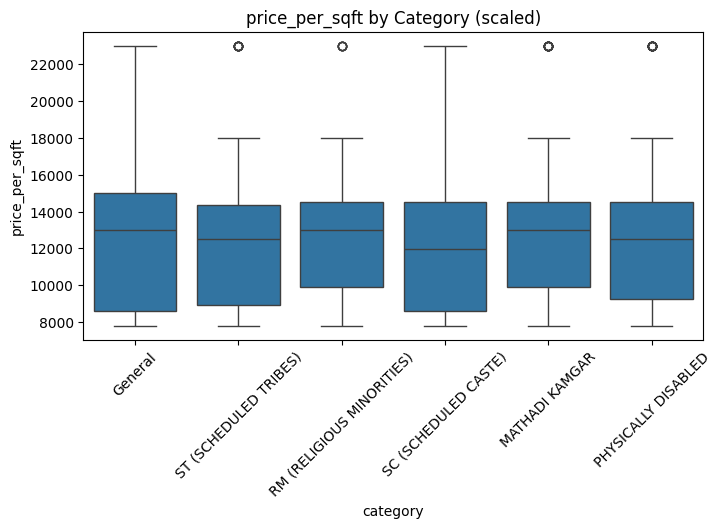

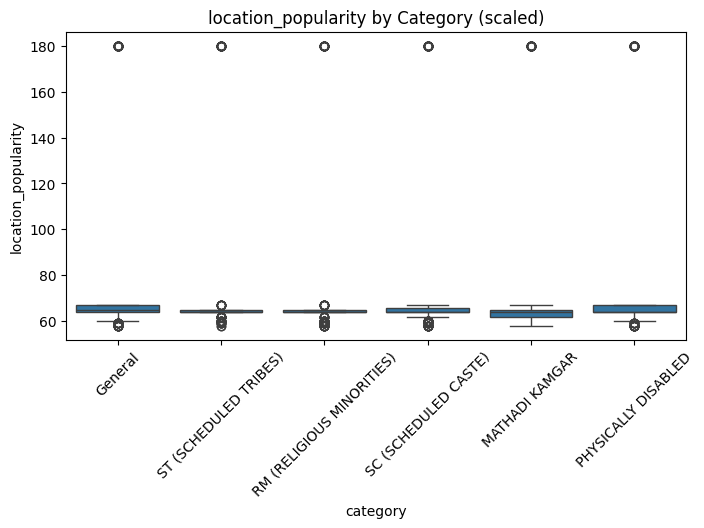

In [ ]:
#histograms and boxplots
num_cols = [col for col in numeric_cols if col in df.columns]

#histograms
if num_cols:
    df[num_cols].hist(bins=20, figsize=(14,10), layout=(len(num_cols)//3 +1, 3))
    plt.suptitle("Histograms of Numeric Variables")
    plt.show()

#Boxplots grouped by category
for col in num_cols:
    valid_data = df[[col, 'category']].dropna()
    if valid_data[col].nunique() > 1 and valid_data['category'].nunique() > 0:
        plt.figure(figsize=(8,4))
        sns.boxplot(x='category', y=col, data=valid_data)
        plt.title(f"{col} by Category")
        plt.xticks(rotation=45)
        plt.show()
import numpy as np

for col in num_cols:
    valid_data = df[[col, 'category']].dropna()
    if valid_data[col].nunique() > 1:
        plt.figure(figsize=(8,4))
        if valid_data[col].max() / valid_data[col].median() > 10:
            sns.boxplot(x='category', y=np.log1p(valid_data[col]), data=valid_data)
            plt.ylabel(f"log(1+{col})")
        else:
            sns.boxplot(x='category', y=col, data=valid_data)
        plt.title(f"{col} by Category (scaled)")
        plt.xticks(rotation=45)
        plt.show()



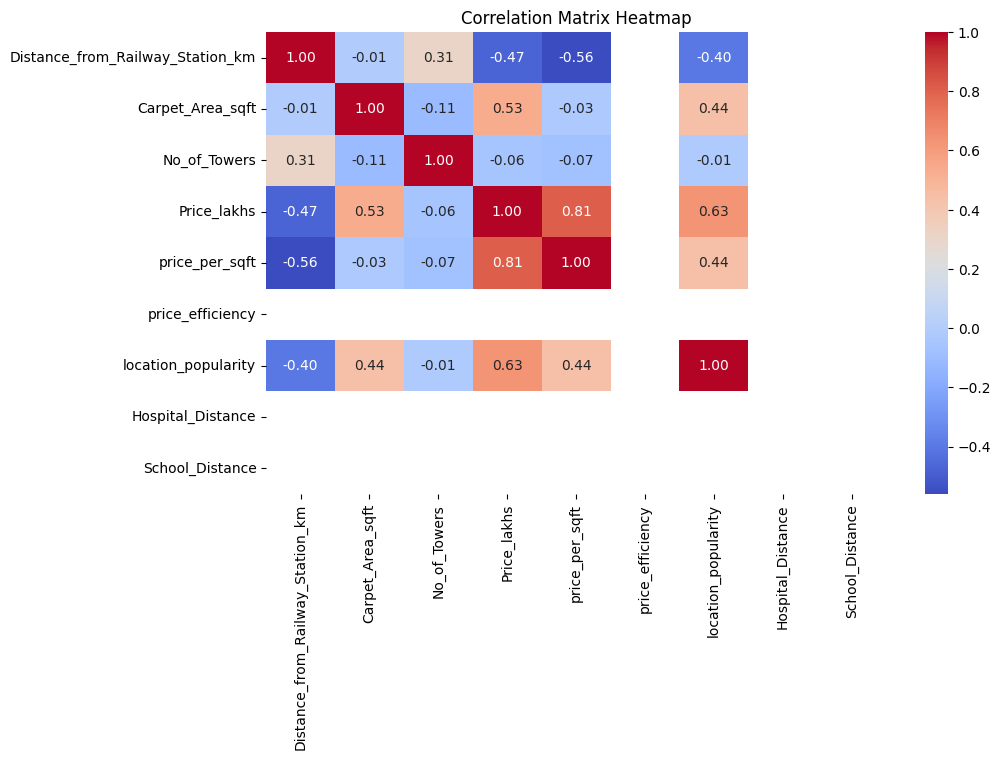

In [ ]:
#correlation heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:

from scipy import stats
df['application_ID'] = df['application_ID'].str.replace("'", "")
df['Price_lakhs'] = pd.to_numeric(df['Price_lakhs'], errors='coerce')
df['Carpet_Area_sqft'] = pd.to_numeric(df['Carpet_Area_sqft'], errors='coerce')
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')

print("T-TEST RESULTS ")


#1. Independent t-test: Price by Category (General vs ST)
general = df[df['category'] == 'General']['Price_lakhs'].dropna()
st = df[df['category'] == 'ST (SCHEDULED TRIBES)']['Price_lakhs'].dropna()

t_stat, p_val = stats.ttest_ind(general, st)
print(f"\n1. PRICE BY CATEGORY (General vs ST):")
print(f"General mean: {general.mean():.2f}, ST mean: {st.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

#2. Independent t-test: Price by Property Type (EWS vs LIG)
ews = df[df['Type'] == 'Ews']['Price_lakhs'].dropna()
lig = df[df['Type'] == 'Lig']['Price_lakhs'].dropna()

t_stat, p_val = stats.ttest_ind(ews, lig)
print(f"\n2. PRICE BY PROPERTY TYPE (EWS vs LIG):")
print(f"EWS mean: {ews.mean():.2f}, LIG mean: {lig.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

# 3. Independent t-test: Price by Distance Category
near = df[df['distance_category'] == 'near']['Price_lakhs'].dropna()
moderate = df[df['distance_category'] == 'moderate']['Price_lakhs'].dropna()

t_stat, p_val = stats.ttest_ind(near, moderate)
print(f"\n3. PRICE BY DISTANCE (Near vs Moderate):")
print(f"Near mean: {near.mean():.2f}, Moderate mean: {moderate.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

# 4. Independent t-test: Carpet Area by Type
ews_area = df[df['Type'] == 'Ews']['Carpet_Area_sqft'].dropna()
lig_area = df[df['Type'] == 'Lig']['Carpet_Area_sqft'].dropna()

t_stat, p_val = stats.ttest_ind(ews_area, lig_area)
print(f"\n4. CARPET AREA BY TYPE (EWS vs LIG):")
print(f"EWS mean: {ews_area.mean():.2f} sqft, LIG mean: {lig_area.mean():.2f} sqft")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

# 5. One-sample t-test: Is average price different from 45 lakhs?
all_prices = df['Price_lakhs'].dropna()
t_stat, p_val = stats.ttest_1samp(all_prices, 45)
print(f"\n5. ONE-SAMPLE TEST (Price vs 45 lakhs):")
print(f"Sample mean: {all_prices.mean():.2f}, Test value: 45.00")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

# 6. One-sample t-test: Is average distance different from 2 km?
all_distances = df['Distance_from_Railway_Station_km'].dropna()
t_stat, p_val = stats.ttest_1samp(all_distances, 2)
print(f"\n6. ONE-SAMPLE TEST (Distance vs 2 km):")
print(f"Sample mean: {all_distances.mean():.2f} km, Test value: 2.00 km")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

# 7. Paired t-test example: First 10 vs Last 10 prices
first_10 = df['Price_lakhs'].head(10).dropna()
last_10 = df['Price_lakhs'].tail(10).dropna()

if len(first_10) == len(last_10):
    t_stat, p_val = stats.ttest_rel(first_10, last_10)
    print(f"\n7. PAIRED TEST (First 10 vs Last 10 prices):")
    print(f"First 10 mean: {first_10.mean():.2f}, Last 10 mean: {last_10.mean():.2f}")
    print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
    print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")


T-TEST RESULTS 

1. PRICE BY CATEGORY (General vs ST):
General mean: 45.87, ST mean: 43.15
t-statistic: 1.408, p-value: 0.160
Significant: No

2. PRICE BY PROPERTY TYPE (EWS vs LIG):
EWS mean: 35.75, LIG mean: 49.16
t-statistic: -20.029, p-value: 0.000
Significant: Yes

3. PRICE BY DISTANCE (Near vs Moderate):
Near mean: 50.13, Moderate mean: 42.12
t-statistic: 6.729, p-value: 0.000
Significant: Yes

4. CARPET AREA BY TYPE (EWS vs LIG):
EWS mean: 322.00 sqft, LIG mean: 322.00 sqft
t-statistic: nan, p-value: nan
Significant: No

5. ONE-SAMPLE TEST (Price vs 45 lakhs):
Sample mean: 44.89, Test value: 45.00
t-statistic: -0.197, p-value: 0.844
Significant: No

6. ONE-SAMPLE TEST (Distance vs 2 km):
Sample mean: 2.51 km, Test value: 2.00 km
t-statistic: 7.120, p-value: 0.000
Significant: Yes

7. PAIRED TEST (First 10 vs Last 10 prices):
First 10 mean: 39.37, Last 10 mean: 48.57
t-statistic: -1.292, p-value: 0.229
Significant: No
